In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Assuming your filename is 'pv_anomaly_sample.csv'
filename = list(uploaded.keys())[0]

# Load dataset
data = pd.read_csv(filename)

# Split features and label
X = data.drop(columns=['f_nv'])
y = data['f_nv']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Saving pv_anomaly_data.csv to pv_anomaly_data.csv
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    232418
           1       1.00      0.99      1.00      1217
           2       1.00      0.99      0.99      2103
           3       1.00      1.00      1.00      1238
           4       0.99      0.99      0.99     37784

    accuracy                           1.00    274760
   macro avg       1.00      1.00      1.00    274760
weighted avg       1.00      1.00      1.00    274760

Confusion Matrix:
[[232203      1      1      0    213]
 [     2   1208      1      0      6]
 [     5      0   2089      2      7]
 [     0      0      0   1238      0]
 [   225      1      7      0  37551]]


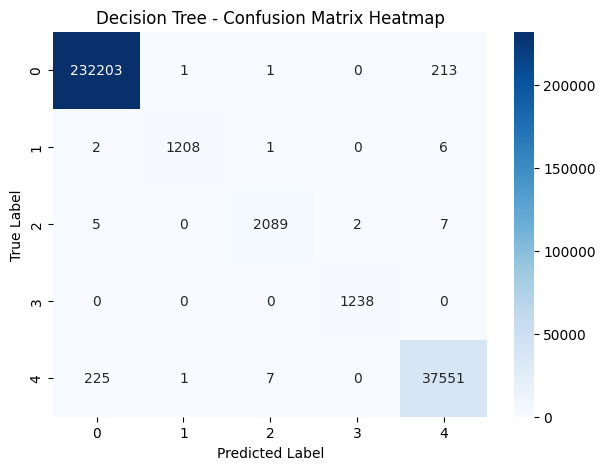

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


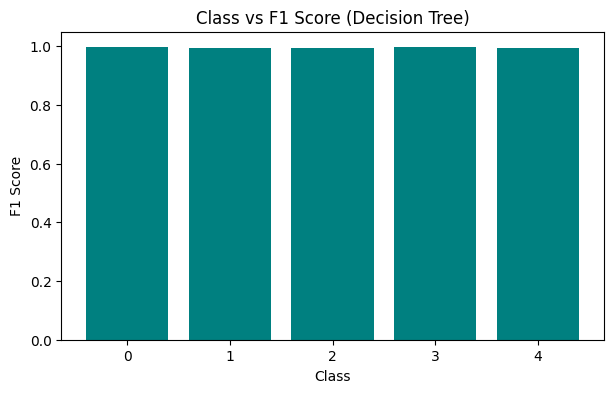

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract class labels (excluding "accuracy", "macro avg", etc.)
class_labels = [label for label in report if label.isdigit()]

# Extract F1 scores for each class
f1_scores = [report[label]['f1-score'] for label in class_labels]

# Plot
plt.figure(figsize=(7,4))
plt.bar(class_labels, f1_scores, color='teal')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('Class vs F1 Score (Decision Tree)')
plt.ylim(0, 1.05)
plt.show()


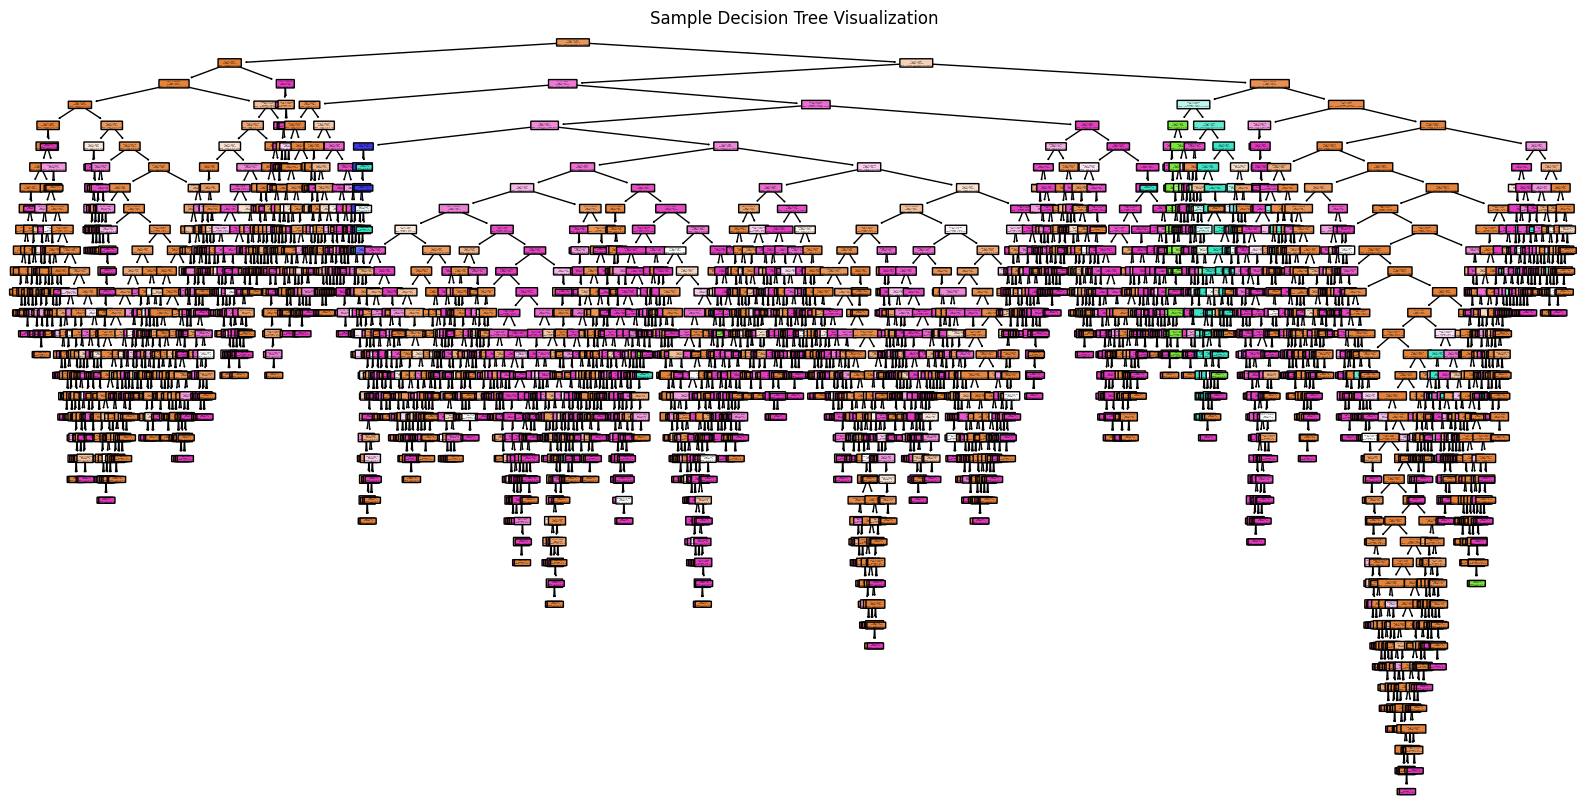

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=[str(i) for i in sorted(y.unique())],
               filled=True,
               rounded=True)
plt.title("Sample Decision Tree Visualization")
plt.show()


In [ ]:
small_data = data.sample(n=300, random_state=42)
X_small = small_data.drop(columns=['f_nv'])
y_small = small_data['f_nv']

clf_small = DecisionTreeClassifier(max_depth=3, random_state=42)  # Use small depth for readability
clf_small.fit(X_small, y_small)


DecisionTreeClassifier(max_depth=3, random_state=42)

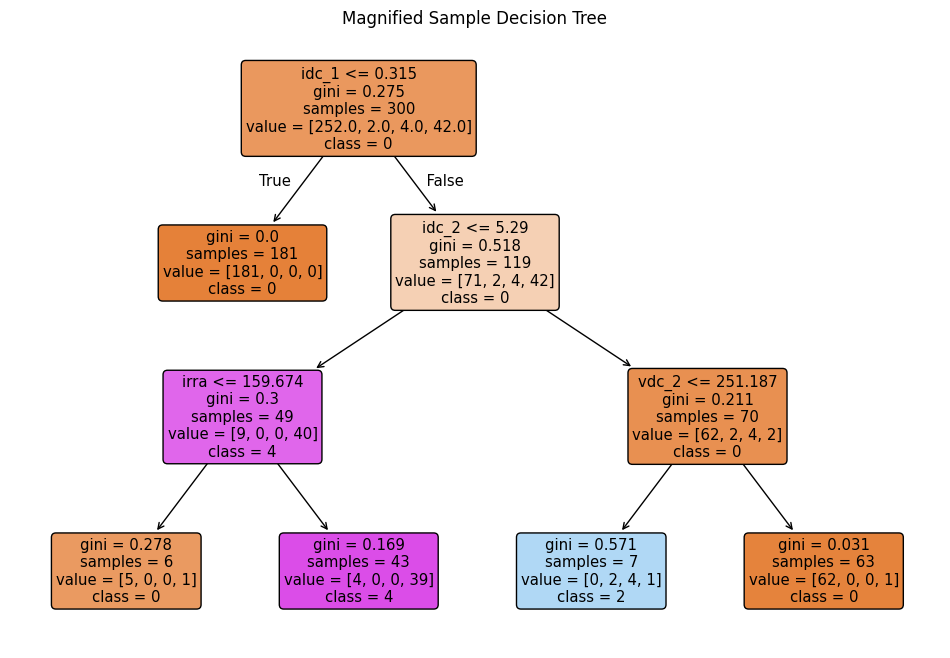

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_small,
               feature_names=X_small.columns,
               class_names=[str(i) for i in sorted(y_small.unique())],
               filled=True,
               rounded=True)
plt.title("Magnified Sample Decision Tree")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your CSV as before
data = pd.read_csv(filename)
X = data.drop(columns=['f_nv'])
y = data['f_nv']

# FIRST: Train/validation+test split (e.g. 70/30)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# SECOND: Split temp into validation and test (e.g. 15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Final sizes: train 70%, val 15%, test 15%

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Tune hyperparameters if needed (use X_val, y_val)
# For basic demo, skip and directly evaluate

# Predict and Evaluate on validation set
print("Validation Set - Classification Report:")
print(classification_report(y_val, clf.predict(X_val)))
print("Validation Set - Confusion Matrix:")
print(confusion_matrix(y_val, clf.predict(X_val)))

# Predict and Evaluate on test set
print("\nTest Set - Classification Report:")
print(classification_report(y_test, clf.predict(X_test)))
print("Test Set - Confusion Matrix:")
print(confusion_matrix(y_test, clf.predict(X_test)))


Validation Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174284
           1       1.00      1.00      1.00       870
           2       1.00      0.99      0.99      1569
           3       1.00      1.00      1.00       927
           4       0.99      0.99      0.99     28420

    accuracy                           1.00    206070
   macro avg       1.00      1.00      1.00    206070
weighted avg       1.00      1.00      1.00    206070

Validation Set - Confusion Matrix:
[[174116      0      2      0    166]
 [     1    866      0      0      3]
 [     6      0   1559      0      4]
 [     0      0      1    926      0]
 [   177      1      4      0  28238]]

Test Set - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    174542
           1       1.00      0.99      1.00       897
           2       1.00      0.99      1.00    

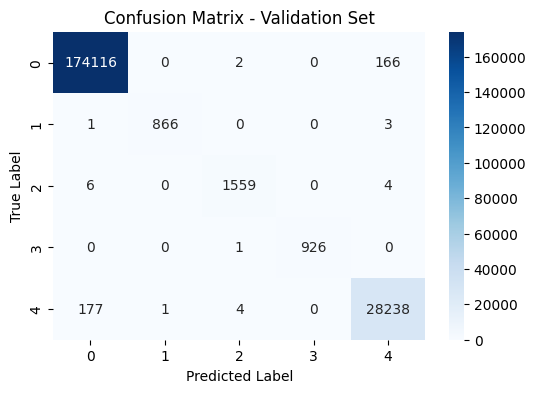

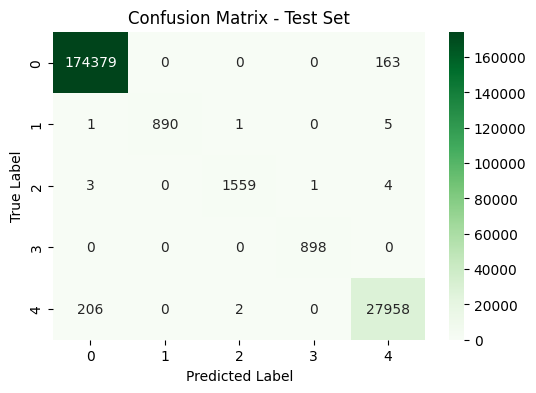

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)

# Confusion matrices
cm_val = confusion_matrix(y_val, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

# Validation set heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Test set heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
